In [1]:
import fabpy as fb
from IPython.display import display, Math
import copy


In [2]:
_U_a = [2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0]
_I_a = [3.78, 10.16, 16.88, 24.84, 32.4, 40.9, 49.94, 62.4, 73.52, 86.31]

# _I_a = [u * 0.001 for u in _I_a]  # Более читаемая альтернатива map

# Создание списков объектов
list_U_a = [
    fb.Values(name=f'U_{{a_{{{i+1}}}}}', values=x, delta=0, unit=r'\text{В}', 
              rounded=True, use_random_error=True, roundoff=0)
    for i, x in enumerate(_U_a)
]

list_I_a = [
    fb.Values(name=f'I_{{a_{{{i+1}}}}}', values=x, delta=0, unit=r'\text{мА}', 
              rounded=True, roundoff=2)
    for i, x in enumerate(_I_a)
]

# Проверка результатов
print(f"Created {len(list_U_a)} U_a objects with IDs: {[obj.value for obj in list_U_a]}")
print(f"Created {len(list_I_a)} I_a objects with IDs: {[obj.value for obj in list_I_a]}")

Created 10 U_a objects with IDs: [2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0]
Created 10 I_a objects with IDs: [3.78, 10.16, 16.88, 24.84, 32.4, 40.9, 49.94, 62.4, 73.52, 86.31]


In [16]:
for index, (I_a, U_a) in enumerate(zip(list_I_a, list_U_a)):
    form_S = I_a / U_a
    print(I_a.value, U_a.value)
    S = fb.Formula(form_S, name=f'S_{{ {index+1} }}', data=[U_a, I_a], unit=r'\text{Ом}^{-1}', roundoff=5, rounded=True)
    display(Math(S.latex()))
    display(Math(S.indetect_error.latex()))

0.00378 2.0


<IPython.core.display.Math object>

<IPython.core.display.Math object>

0.01016 4.0


<IPython.core.display.Math object>

<IPython.core.display.Math object>

0.01688 6.0


<IPython.core.display.Math object>

<IPython.core.display.Math object>

0.02484 8.0


<IPython.core.display.Math object>

<IPython.core.display.Math object>

0.0324 10.0


<IPython.core.display.Math object>

<IPython.core.display.Math object>

0.0409 12.0


<IPython.core.display.Math object>

<IPython.core.display.Math object>

0.04994 14.0


<IPython.core.display.Math object>

<IPython.core.display.Math object>

0.0624 16.0


<IPython.core.display.Math object>

<IPython.core.display.Math object>

0.07352 18.0


<IPython.core.display.Math object>

<IPython.core.display.Math object>

0.08631 20.0


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [20]:
display(Math(S.latex()))
display(Math(S.indetect_error.latex()))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
class A:
    def __init__(self, a):
        self.a = a

a = [A(i) for i in range(10)]
print([id(i) for i in a])

[2149319160368, 2149320070224, 2149320069904, 2149277068352, 2149284216912, 2149319671344, 2149320026016, 2149320026832, 2149278306128, 2149319987792]


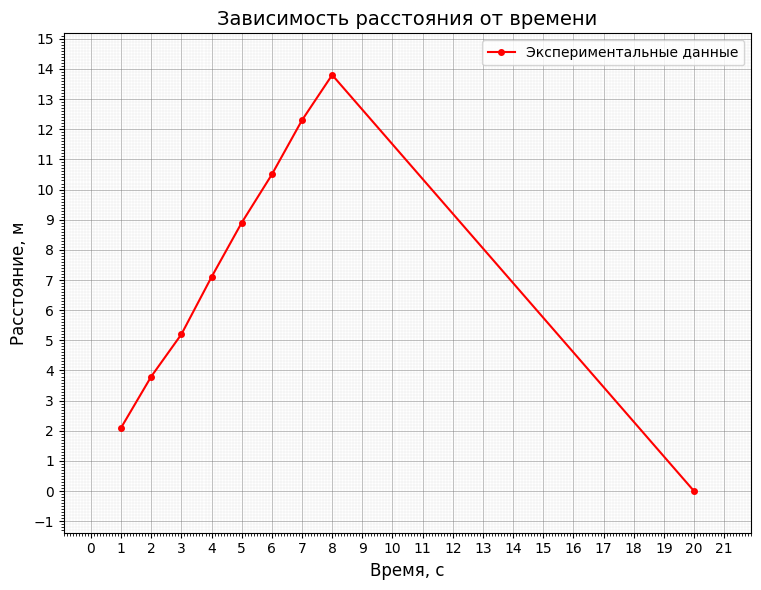

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def plot_on_true_millimeter_paper(x, y, xlabel='X', ylabel='Y', title='График на миллиметровке', 
                                 major_grid=True, minor_grid=True, figsize=(10, 6)):
    """
    Строит график на настоящей миллиметровке с соблюдением масштаба по осям
    """
    
    fig, ax = plt.subplots(figsize=figsize)
    
    # Устанавливаем одинаковый масштаб по осям!
    ax.set_aspect('equal', adjustable='box')
    
    # Основная сетка (каждые 1 единица)
    if major_grid:
        ax.grid(True, which='major', color='gray', linestyle='-', linewidth=0.5, alpha=0.7)
    
    # Дополнительная сетка (каждые 0.1 единицы)
    if minor_grid:
        ax.grid(True, which='minor', color='lightgray', linestyle='-', linewidth=0.3, alpha=0.5)
        ax.minorticks_on()
    
    # Построение графика
    ax.plot(x, y, 'ro-', linewidth=1.5, markersize=4, label='Экспериментальные данные')
    
    # Настройки осей
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.legend()
    
    # Устанавливаем одинаковые интервалы для сетки
    ax.xaxis.set_major_locator(plt.MultipleLocator(1.0))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
    ax.yaxis.set_major_locator(plt.MultipleLocator(1.0))
    ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
    
    # Вычисляем оптимальные пределы для симметричного отображения
    x_margin = (max(x) - min(x)) * 0.1
    y_margin = (max(y) - min(y)) * 0.1
    ax.set_xlim(min(x) - x_margin, max(x) + x_margin)
    ax.set_ylim(min(y) - y_margin, max(y) + y_margin)
    
    plt.tight_layout()
    plt.savefig("test.pdf", dpi=300, bbox_inches='tight', format='pdf')
    return fig, ax

# Пример использования
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 20])
y = np.array([2.1, 3.8, 5.2, 7.1, 8.9, 10.5, 12.3, 13.8, 0])

fig, ax = plot_on_true_millimeter_paper(x, y, 'Время, с', 'Расстояние, м', 'Зависимость расстояния от времени')
plt.show()

In [9]:
for i, u in zip(list_I_a, list_U_a):
    S = fb.Formula(name='S', formula=i / u, unit=r"\text{Ом}^{-1}", data=[i,u], rounded=True, roundoff=2)
    print(fr"\[ {S.latex()} \]")

\[ S = \frac{I_{a_0}}{U_{a_0}} = \frac{3,78 \, \text{мА}}{2,0 \, \text{В}} = 1,89 \, \mathrm{ \text{Ом}^{-1} } \]
\[ S = \frac{I_{a_1}}{U_{a_1}} = \frac{10,16 \, \text{мА}}{4,0 \, \text{В}} = 2,54 \, \mathrm{ \text{Ом}^{-1} } \]
\[ S = \frac{I_{a_2}}{U_{a_2}} = \frac{16,88 \, \text{мА}}{6,0 \, \text{В}} = 2,81 \, \mathrm{ \text{Ом}^{-1} } \]
\[ S = \frac{I_{a_3}}{U_{a_3}} = \frac{24,84 \, \text{мА}}{8,0 \, \text{В}} = 3,10 \, \mathrm{ \text{Ом}^{-1} } \]
\[ S = \frac{I_{a_4}}{U_{a_4}} = \frac{32,4 \, \text{мА}}{10,0 \, \text{В}} = 3,24 \, \mathrm{ \text{Ом}^{-1} } \]
\[ S = \frac{I_{a_5}}{U_{a_5}} = \frac{40,9 \, \text{мА}}{12,0 \, \text{В}} = 3,41 \, \mathrm{ \text{Ом}^{-1} } \]
\[ S = \frac{I_{a_6}}{U_{a_6}} = \frac{49,94 \, \text{мА}}{14,0 \, \text{В}} = 3,57 \, \mathrm{ \text{Ом}^{-1} } \]
\[ S = \frac{I_{a_7}}{U_{a_7}} = \frac{62,4 \, \text{мА}}{16,0 \, \text{В}} = 3,90 \, \mathrm{ \text{Ом}^{-1} } \]
\[ S = \frac{I_{a_8}}{U_{a_8}} = \frac{73,52 \, \text{мА}}{18,0 \, \text{В}} = 4

In [24]:
for i in range(len(list_I_a)-1):
    i1, i2 = list_I_a[i], list_I_a[i+1]
    u1, u2 = list_U_a[i], list_U_a[i+1]
    form = (i2 - i1) / (u2 - u1)
    S = fb.Formula(name=f'S_{i+1}', formula=form, unit=r"\text{Ом}^{-1}", data=[i1,i2,u1,u2], rounded=True, roundoff=2)
    # print(fr"\[ {S.latex()} \]")
    print(fr"\[ {S.indetect_error.latex(print_result=False, print_values=False)} \]")

\[ \Delta{ S_1 } = 0 \]
\[ \Delta{ S_2 } = 0 \]
\[ \Delta{ S_3 } = 0 \]
\[ \Delta{ S_4 } = 0 \]
\[ \Delta{ S_5 } = 0 \]
\[ \Delta{ S_6 } = 0 \]
\[ \Delta{ S_7 } = 0 \]
\[ \Delta{ S_8 } = 0 \]
\[ \Delta{ S_9 } = 0 \]


In [ ]:
from sympy import sqrt

sqrt(sum([(list_I_a[i]-1)**2 for i in range(len(list_I_a))])) / 




sqrt((I_{a_{10}} - 1)**2 + (I_{a_{1}} - 1)**2 + (I_{a_{2}} - 1)**2 + (I_{a_{3}} - 1)**2 + (I_{a_{4}} - 1)**2 + (I_{a_{5}} - 1)**2 + (I_{a_{6}} - 1)**2 + (I_{a_{7}} - 1)**2 + (I_{a_{8}} - 1)**2 + (I_{a_{9}} - 1)**2)

In [15]:
string_1 = r"\[ {} \]"

In [16]:
for index, u in enumerate(list_U_a):
    delta_u = fb.Formula(name=fr'\Delta U_{{\text{{приб}}_{{ {index+1} }}}}', formula=(0.005 * u + 0.001*299), data=[u], roundoff=2, rounded=True, unit=r'\text{В}')
    # print(r"\[ {} \]".format(delta_u.latex()))
    print(delta_u.round_value(), end=', ')

0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 

$$ \Delta U_{\text{приб}_{ 0 }} = 0.005 U_{a_{1}} + 0.299 = 0,005 \times 2,0 \, \text{В} + 0,299 = 0,31 \, \mathrm{ \text{В} } $$
$$ \Delta U_{\text{приб}_{ 1 }} = 0.005 U_{a_{2}} + 0.299 = 0,005 \times 4,0 \, \text{В} + 0,299 = 0,32 \, \mathrm{ \text{В} } $$
$$ \Delta U_{\text{приб}_{ 2 }} = 0.005 U_{a_{3}} + 0.299 = 0,005 \times 6,0 \, \text{В} + 0,299 = 0,33 \, \mathrm{ \text{В} } $$
$$ \Delta U_{\text{приб}_{ 3 }} = 0.005 U_{a_{4}} + 0.299 = 0,005 \times 8,0 \, \text{В} + 0,299 = 0,34 \, \mathrm{ \text{В} } $$
$$ \Delta U_{\text{приб}_{ 4 }} = 0.005 U_{a_{5}} + 0.299 = 0,005 \times 10,0 \, \text{В} + 0,299 = 0,35 \, \mathrm{ \text{В} } $$
$$ \Delta U_{\text{приб}_{ 5 }} = 0.005 U_{a_{6}} + 0.299 = 0,005 \times 12,0 \, \text{В} + 0,299 = 0,36 \, \mathrm{ \text{В} } $$
$$ \Delta U_{\text{приб}_{ 6 }} = 0.005 U_{a_{7}} + 0.299 = 0,005 \times 14,0 \, \text{В} + 0,299 = 0,37 \, \mathrm{ \text{В} } $$
$$ \Delta U_{\text{приб}_{ 7 }} = 0.005 U_{a_{8}} + 0.299 = 0,005 \times 16,0 \, \text{В} + 0,299 = 0,38 \, \mathrm{ \text{В} } $$
$$ \Delta U_{\text{приб}_{ 8 }} = 0.005 U_{a_{9}} + 0.299 = 0,005 \times 18,0 \, \text{В} + 0,299 = 0,39 \, \mathrm{ \text{В} } $$
$$ \Delta U_{\text{приб}_{ 9 }} = 0.005 U_{a_{10}} + 0.299 = 0,005 \times 20,0 \, \text{В} + 0,299 = 0,40 \, \mathrm{ \text{В} } $$


In [25]:
s = r"""\[ S_1 = \frac{I_{a_{2}} - I_{a_{1}}}{U_{a_{2}} - U_{a_{1}}} = \frac{10,16 \, \text{мА} - 3,78 \, \text{мА}}{4 \, \text{В} - 2 \, \text{В}} =\\= 3,19 \times 10^{-3} \, \mathrm{ \text{Ом}^{-1} } \]
\[ S_2 = \frac{I_{a_{3}} - I_{a_{2}}}{U_{a_{3}} - U_{a_{2}}} = \frac{16,88 \, \text{мА} - 10,16 \, \text{мА}}{6 \, \text{В} - 4 \, \text{В}} = 3,36 \times 10^{-3} \, \mathrm{ \text{Ом}^{-1} } \]
\[ S_3 = \frac{I_{a_{4}} - I_{a_{3}}}{U_{a_{4}} - U_{a_{3}}} = \frac{24,84 \, \text{мА} - 16,88 \, \text{мА}}{8 \, \text{В} - 6 \, \text{В}} = 3,98 \times 10^{-3} \, \mathrm{ \text{Ом}^{-1} } \]
\[ S_4 = \frac{I_{a_{5}}- I_{a_{4}}}{U_{a_{5}} - U_{a_{4}}} = \frac{32,4 \, \text{мА} - 24,84 \, \text{мА}}{10 \, \text{В} - 8 \, \text{В}} = 3,78 \times 10^{-3} \, \mathrm{ \text{Ом}^{-1} } \]
\[ S_5 = \frac{I_{a_{6}}- I_{a_{5}}}{U_{a_{6}} - U_{a_{5}} } = \frac{40,9 \, \text{мА} - 32,4 \, \text{мА}}{12 \, \text{В} - 10 \, \text{В}} = 4,25 \times 10^{-3} \, \mathrm{ \text{Ом}^{-1} } \]
\[ S_6 = \frac{I_{a_{7}} - I_{a_{6}}}{U_{a_{7}} - U_{a_{6}}} = \frac{49,94 \, \text{мА} - 40,9 \, \text{мА}}{14 \, \text{В} - 12 \, \text{В}} = 4,52 \times 10^{-3} \, \mathrm{ \text{Ом}^{-1} } \]
\[ S_7 = \frac{I_{a_{8}} - I_{a_{7}}}{U_{a_{8}} - U_{a_{7}}} = \frac{62,4 \, \text{мА} - 49,94 \, \text{мА}}{16 \, \text{В} - 14 \, \text{В}} = 6,23 \times 10^{-3} \, \mathrm{ \text{Ом}^{-1} } \]
\[ S_8 = \frac{I_{a_{9}} - I_{a_{8}}}{U_{a_{9}} - U_{a_{8}}} = \frac{73,52 \, \text{мА} - 62,4 \, \text{мА}}{18 \, \text{В} - 16 \, \text{В}} = 5,56 \times 10^{-3} \, \mathrm{ \text{Ом}^{-1} } \]
\[ S_9 = \frac{I_{a_{10}} - I_{a_{9}}}{U_{a_{10}} - U_{a_{9}}} = \frac{86,31 \, \text{мА} - 73,52 \, \text{мА}}{20 \, \text{В} - 18 \, \text{В}} = 6,40 \times 10^{-3} \, \mathrm{ \text{Ом}^{-1} } \]"""

s = s.replace(r'\[', r'\begin{multline*}').replace(r'\]', r'\end{multline*}')
print(s)

\begin{multline*} S_1 = \frac{I_{a_{2}} - I_{a_{1}}}{U_{a_{2}} - U_{a_{1}}} = \frac{10,16 \, \text{мА} - 3,78 \, \text{мА}}{4 \, \text{В} - 2 \, \text{В}} =\\= 3,19 \times 10^{-3} \, \mathrm{ \text{Ом}^{-1} } \end{multline*}
\begin{multline*} S_2 = \frac{I_{a_{3}} - I_{a_{2}}}{U_{a_{3}} - U_{a_{2}}} = \frac{16,88 \, \text{мА} - 10,16 \, \text{мА}}{6 \, \text{В} - 4 \, \text{В}} = 3,36 \times 10^{-3} \, \mathrm{ \text{Ом}^{-1} } \end{multline*}
\begin{multline*} S_3 = \frac{I_{a_{4}} - I_{a_{3}}}{U_{a_{4}} - U_{a_{3}}} = \frac{24,84 \, \text{мА} - 16,88 \, \text{мА}}{8 \, \text{В} - 6 \, \text{В}} = 3,98 \times 10^{-3} \, \mathrm{ \text{Ом}^{-1} } \end{multline*}
\begin{multline*} S_4 = \frac{I_{a_{5}}- I_{a_{4}}}{U_{a_{5}} - U_{a_{4}}} = \frac{32,4 \, \text{мА} - 24,84 \, \text{мА}}{10 \, \text{В} - 8 \, \text{В}} = 3,78 \times 10^{-3} \, \mathrm{ \text{Ом}^{-1} } \end{multline*}
\begin{multline*} S_5 = \frac{I_{a_{6}}- I_{a_{5}}}{U_{a_{6}} - U_{a_{5}} } = \frac{40,9 \, \text{мА} - 32,

In [3]:
_U_a = [2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0]
_I_a = [3.78, 10.16, 16.88, 24.84, 32.4, 40.9, 49.94, 62.4, 73.52, 86.31]
_dU_a = [0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4]
_dI_a = [0.03, 0.04, 0.05, 0.07, 0.08, 0.1, 0.12, 0.14, 0.17, 0.19]


# _I_a = [u * 0.001 for u in _I_a]  # Более читаемая альтернатива map

# Создание списков объектов
list_U_a = [
    fb.Values(name=f'U_{{a_{{{i+1}}}}}', values=x, delta=0, unit=r'\text{В}', 
              rounded=True, use_random_error=True, roundoff=0)
    for i, x in enumerate(_U_a)
]

list_I_a = [
    fb.Values(name=f'I_{{a_{{{i+1}}}}}', values=x, delta=0, unit=r'\text{мА}', 
              rounded=True, roundoff=2)
    for i, x in enumerate(_I_a)
]

list_delta_U_a = [
    fb.Values(name=fr'\Delta U_{{a_{{{i+1}}}}}', values=x, delta=0, unit=r'\text{В}', 
              rounded=True, use_random_error=True, roundoff=2)
    for i, x in enumerate(_dU_a)
]

list_delta_I_a = [
    fb.Values(name=fr'\Delta I_{{a_{{{i+1}}}}}', values=x, delta=0, unit=r'\text{мА}', 
              rounded=True, roundoff=2)
    for i, x in enumerate(_dI_a)
]

print([i.value for i in list_delta_I_a])
print([i.value for i in list_delta_U_a])

[0.03, 0.04, 0.05, 0.07, 0.08, 0.1, 0.12, 0.14, 0.17, 0.19]
[0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4]


In [5]:
import sympy as sp

for i in range(len(list_I_a)-1):
    i1, u1, di1, du1 = list_I_a[i], list_U_a[i], list_delta_I_a[i], list_delta_U_a[i]
    i2, u2, di2, du2 = list_I_a[i+1], list_U_a[i+1], list_delta_I_a[i+1], list_delta_U_a[i+1]
    form = sp.sqrt((di1**2 + di2**2) * (u2 - u1)**2 + (du1**2 + du2**2) * (i2 - i1)**2) / (u2 - u1)**2

    dS = fb.Formula(form, data=[i1, u1, di1, du1, i2, u2, di2, du2], unit=r"\frac{\text{мА}}{\text{В}}", name=r"\Delta S", roundoff=2, rounded=True)
    print(r"\[ {} \]".format(dS.latex()))

\[ \Delta S = \frac{\sqrt{\left(- I_{a_{1}} + I_{a_{2}}\right)^{2} \left(\Delta U_{a_{1}}^{2} + \Delta U_{a_{2}}^{2}\right) + \left(- U_{a_{1}} + U_{a_{2}}\right)^{2} \left(\Delta I_{a_{1}}^{2} + \Delta I_{a_{2}}^{2}\right)}}{\left(- U_{a_{1}} + U_{a_{2}}\right)^{2}} = \frac{\sqrt{\left(0,03 \, \text{мА}^{2} + 0,04 \, \text{мА}^{2}\right) \times \left(- 2,0 \, \text{В} + 4,0 \, \text{В}\right)^{2} + \left(0,31 \, \text{В}^{2} + 0,32 \, \text{В}^{2}\right) \times \left(10,16 \, \text{мА} - 3,78 \, \text{мА}\right)^{2}}}{\left(- 2,0 \, \text{В} + 4,0 \, \text{В}\right)^{2}} = 0,71 \, \mathrm{ \frac{\text{мА}}{\text{В}} } \]
\[ \Delta S = \frac{\sqrt{\left(- I_{a_{2}} + I_{a_{3}}\right)^{2} \left(\Delta U_{a_{2}}^{2} + \Delta U_{a_{3}}^{2}\right) + \left(- U_{a_{2}} + U_{a_{3}}\right)^{2} \left(\Delta I_{a_{2}}^{2} + \Delta I_{a_{3}}^{2}\right)}}{\left(- U_{a_{2}} + U_{a_{3}}\right)^{2}} = \frac{\sqrt{\left(0,04 \, \text{мА}^{2} + 0,05 \, \text{мА}^{2}\right) \times \left(- 4,0 \, \text{В

In [14]:
form = sum([i * u**(3/2) for i, u in zip(list_I_a, list_U_a)]) / sum([u**3 for u in list_U_a])
g = fb.Formula(formula=form, name='g', data=[*list_I_a, *list_U_a], roundoff=2, rounded=True)
display(Math(g.latex()))
print(g.latex())

<IPython.core.display.Math object>

g = \frac{I_{a_{10}} U_{a_{10}}^{1.5} + I_{a_{1}} U_{a_{1}}^{1.5} + I_{a_{2}} U_{a_{2}}^{1.5} + I_{a_{3}} U_{a_{3}}^{1.5} + I_{a_{4}} U_{a_{4}}^{1.5} + I_{a_{5}} U_{a_{5}}^{1.5} + I_{a_{6}} U_{a_{6}}^{1.5} + I_{a_{7}} U_{a_{7}}^{1.5} + I_{a_{8}} U_{a_{8}}^{1.5} + I_{a_{9}} U_{a_{9}}^{1.5}}{U_{a_{10}}^{3} + U_{a_{1}}^{3} + U_{a_{2}}^{3} + U_{a_{3}}^{3} + U_{a_{4}}^{3} + U_{a_{5}}^{3} + U_{a_{6}}^{3} + U_{a_{7}}^{3} + U_{a_{8}}^{3} + U_{a_{9}}^{3}} = \frac{10,0 \, \text{В}^{1,5} \times 32,4 \, \text{мА} + 10,16 \, \text{мА} \times 4,0 \, \text{В}^{1,5} + 12,0 \, \text{В}^{1,5} \times 40,9 \, \text{мА} + 14,0 \, \text{В}^{1,5} \times 49,94 \, \text{мА} + 16,0 \, \text{В}^{1,5} \times 62,4 \, \text{мА} + 16,88 \, \text{мА} \times 6,0 \, \text{В}^{1,5} + 18,0 \, \text{В}^{1,5} \times 73,52 \, \text{мА} + 2,0 \, \text{В}^{1,5} \times 3,78 \, \text{мА} + 20,0 \, \text{В}^{1,5} \times 86,31 \, \text{мА} + 24,84 \, \text{мА} \times 8,0 \, \text{В}^{1,5}}{10,0 \, \text{В}^{3} + 12,0 \, \text{В}^

In [11]:
a = [1,2,3]
[4,5,6,*a]

[4, 5, 6, 1, 2, 3]

In [11]:
s = r"""0	0.13
10	4.67
20	6.01
30	7.50
40	8.97
50	10.47
60	12.00
70	13.59
80	15.20
90	16.88
100	18.57
110	20.31"""

data = list(map(lambda x: list(map(float,x.split('\t'))), s.split('\n')))
data

[[0.0, 0.13],
 [10.0, 4.67],
 [20.0, 6.01],
 [30.0, 7.5],
 [40.0, 8.97],
 [50.0, 10.47],
 [60.0, 12.0],
 [70.0, 13.59],
 [80.0, 15.2],
 [90.0, 16.88],
 [100.0, 18.57],
 [110.0, 20.31]]

In [12]:
for i in data:
    print(tuple(i), end=' ')

(0.0, 0.13) (10.0, 4.67) (20.0, 6.01) (30.0, 7.5) (40.0, 8.97) (50.0, 10.47) (60.0, 12.0) (70.0, 13.59) (80.0, 15.2) (90.0, 16.88) (100.0, 18.57) (110.0, 20.31) 

In [16]:
_nu = [10, 20, 40, 50, 70, 90, 12, 14, 18, 23, 27, 50, 60, 70, 80, 90]
_k = [2] + [3] * 5 + [4] * 10

_k = [10**i for i in _k]

list_nu = []
list_k = []

for index, (nu, k) in enumerate(zip(_nu, _k)):
    list_nu.append(
        fb.Values(
            name=fr"\nu_\text{{уст {index+1}}}",
            values=nu,
            delta=0,
            unit=r'\text{Гц}',
            roundoff=0,
            rounded=True
        )
    )
    
    list_k.append(
        fb.Values(
            name=fr"k_\text{{пр {index+1}}}",
            values=k,
            delta=0,
            unit=r'',
            roundoff=0,
            rounded=True
        )
    )

In [17]:
format_md = r"$$ {} $$"
format_tex = r"\[ {} \]"

def printmd(string) -> None:
    print(format_md.format(string))

def printex(string) -> None:
    print(format_tex.format(string))

In [18]:
for index, (nu, k) in enumerate(zip(list_nu, list_k)):
    K = fb.Formula(
        (2 * nu + 30) / 100 * k,
        data=[nu, k],
        unit=r'\text{кГц}',
        name=fr"\Delta \nu_{{{index+1}}}", roundoff=0, rounded=False
    )
    printex(K.latex())
    # display(Math(K.latex()))

\[ \Delta \nu_{1} = k_\text{пр 1} \left(\frac{\nu_\text{уст 1}}{50} + \frac{3}{10}\right) = 100 \,  \times \left(\frac{10 \, \text{Гц}}{50} + \frac{3}{10}\right) = 50 \, \mathrm{ \text{кГц} } \]
\[ \Delta \nu_{2} = k_\text{пр 2} \left(\frac{\nu_\text{уст 2}}{50} + \frac{3}{10}\right) = 1000 \,  \times \left(\frac{20 \, \text{Гц}}{50} + \frac{3}{10}\right) = 700 \, \mathrm{ \text{кГц} } \]
\[ \Delta \nu_{3} = k_\text{пр 3} \left(\frac{\nu_\text{уст 3}}{50} + \frac{3}{10}\right) = 1000 \,  \times \left(\frac{40 \, \text{Гц}}{50} + \frac{3}{10}\right) = 1100 \, \mathrm{ \text{кГц} } \]
\[ \Delta \nu_{4} = k_\text{пр 4} \left(\frac{\nu_\text{уст 4}}{50} + \frac{3}{10}\right) = 1000 \,  \times \left(\frac{50 \, \text{Гц}}{50} + \frac{3}{10}\right) = 1300 \, \mathrm{ \text{кГц} } \]
\[ \Delta \nu_{5} = k_\text{пр 5} \left(\frac{\nu_\text{уст 5}}{50} + \frac{3}{10}\right) = 1000 \,  \times \left(\frac{70 \, \text{Гц}}{50} + \frac{3}{10}\right) = 1700 \, \mathrm{ \text{кГц} } \]
\[ \Delta \nu_

In [6]:
from fabpy import Values, Formula

In [7]:
_U_a = [i for i in range(60, 180+1, 10)]
_I_a = [0.12, 0.34, 0.72, 1.26, 1.95, 2.77, 3.72, 4.75, 5.93, 7.15, 8.44, 9.84, 11.27]

In [ ]:
list_U_a = []
list_I_a = []

for u in _U_a:
    list_U_a.append(Values(
        name='U_a',
        values=u,
        
    ))

(13, 13)

In [ ]:
_U_a = [i for i in range(60, 180+1, 10)]
_I_a = [0.12, 0.34, 0.72, 1.26, 1.95, 2.77, 3.72, 4.75, 5.93, 7.15, 8.44, 9.84, 11.27]

list_U_a = 